In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
# Visualize

def visualize(filename) : 
    with open('{}.txt'.format(filename)) as f : 
        lines = f.read()

    ls = [i.split("\n") for i in lines.split('###################################################################')]
    ls = [j for i in ls for j in i if j]

    Training_loss = [float(re.findall('\d[.]\d{,4}',i)[0]) for i in ls if "Training loss" in i]
    Training_accuracy = [float(re.findall('\d[.]\d{,4}',i)[0]) for i in ls if "Training accuracy" in i]
    
    Validation_loss = [float(re.findall('\d[.]\d{,4}',i)[0]) for i in ls if "Validation loss" in i]
    Validation_accuracy = [float(re.findall('\d[.]\d{,4}',i)[0]) for i in ls if "Validation accuracy" in i]

    return Training_accuracy, Validation_accuracy

# Korean

In [3]:
random_train_acc, random_val_acc = visualize('korean_random_sampling_with_embedding')
us_train_acc, us_val_acc = visualize('korean_uncertainty_sampling_with_embedding')
al_train_acc1, al_val_acc1 = visualize('korean_k=1000,beta=10_with_embedding_mean')
al_train_acc2, al_val_acc2 = visualize('korean_k=1000,beta=10_with_embedding_sum')
al_train_acc3, al_val_acc3 = visualize('korean_paper_replicate')

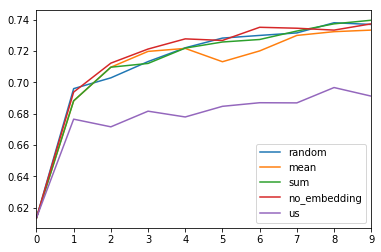

In [5]:
df=pd.DataFrame()
df['random'] = random_val_acc[:10]
df['mean'] = al_val_acc1[:10]
df['sum'] = al_val_acc2[:10]
df['no_embedding'] = al_val_acc3[:10]
df['us'] = us_val_acc[:10]

df.plot()

# English

In [42]:
random_train_acc, random_val_acc = visualize('english_random_sampling_with_embedding')
us_train_acc, us_val_acc = visualize('english_uncertainty_sampling_with_embedding')
al_train_acc1, al_val_acc1 = visualize('k=1000,beta=10_with_embedding')
al_train_acc2, al_val_acc2 = visualize('paper_replicate')
al_train_acc3, al_val_acc3 = visualize('k=1000,beta=10_with_embedding_mean')

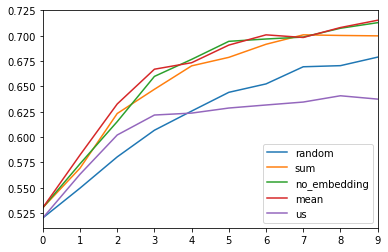

In [41]:
df=pd.DataFrame()
df['random'] = random_val_acc[:10]
# df['grad=False'] = al_val_acc1[:10]
df['sum'] = al_val_acc2[:10]
df['no_embedding'] = al_val_acc3[:10]
df['mean'] = al_val_acc4[:10]
df['us'] = us_val_acc[:10]


df.plot()